# Nanodegree Engenheiro de Machine Learning
## Unsupervised Learning
## Project 3: Creating Customer Segments

Bem-vindo ao terceiro projeto do Nanodegree Engenheiro de Machine Learning! Neste Notebook, alguns modelos de código já foram fornecidos e será seu trabalho implementar funcionalidades adicionais necessárias para completar seu projeto com êxito. Seções que começam com **'Implementação'** no cabeçalho indicam que os blocos de código seguintes vão precisar de funcionalidades adicionais que você deve fornecer. As instruções serão fornecidas para cada seção e as especificações da implementação são marcados no bloco de código com um `'TODO'`. Leia as instruções atentamente!

Além de implementar códigos, há perguntas que você deve responder relacionadas ao projeto e a sua implementação. Cada seção na qual você responderá uma questão está precedida de um cabeçalho **'Questão X'**. Leia atentamente cada questão e forneça respostas completas nos boxes seguintes que começam com **'Resposta:'**. O envio do seu projeto será avaliado baseado nas suas respostas para cada uma das questões e na implementação que você forneceu.  

>**Nota:** Células de código e Markdown podem ser executadas utilizando o atalho do teclado **Shift+Enter**. Além disso, células de Markdown podem ser editadas ao dar duplo clique na célula para entrar no modo de edição.

## Começando

Neste projeto, você irá analisar o conjunto de dados de montantes de despesas anuais de vários clientes (reportados em *unidades monetárias*) de diversas categorias de produtos para estrutura interna. Um objetivo deste projeto é melhor descrever a variação de diferentes tipos de clientes que um distribuidor de atacado interage. Isso dará ao distribuidor discernimento sobre como melhor estruturar seu serviço de entrega de acordo com as necessidades de cada cliente.

O conjunto de dados deste projeto pode ser encontrado no [Repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). Para efeitos de projeto, os atributos `'Channel'` e `'Region'` serão excluídos da análise – que focará então nas seis categorias de produtos registrados para clientes.

Execute o bloco de código abaixo para carregar o conjunto de dados de clientes da distribuidora, junto com algumas das bibliotecas de Python necessárias exigidos para este projeto. Você saberá que o conjunto de dados carregou com êxito se o tamanho do conjunto de dados for reportado.

In [1]:
import pandas as pd
import numpy as np
import gc
import math

#libs de visualizacao
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import Image
from IPython.core.display import HTML


#Figuras aparecerem nos outputs das células
%matplotlib inline

#ignora warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Formato de gráfico padrão 

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
pd.options.display.float_format = '{:.2f}'.format
rc={'savefig.dpi': 75, 'figure.autolayout': False, 'figure.figsize': [12, 8], 'axes.labelsize': 18,\
   'axes.titlesize': 18, 'font.size': 18, 'lines.linewidth': 2.0, 'lines.markersize': 8, 'legend.fontsize': 16,\
   'xtick.labelsize': 16, 'ytick.labelsize': 16}

sns.set(style='darkgrid',rc=rc)

default_color = '#56B4E9'
colormap = plt.cm.cool

In [3]:
# Importe as bibliotecas necessárias para este projeto
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Mostre matplotlib no corpo do texto (bem formatado no Notebook)
%matplotlib inline

# Carregue o conjunto de dados dos clientes da distribuidora de atacado
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Observando os Dados
Nesta seção, você vai começar a explorar os dados através de visualizações e códigos para entender como cada atributo é relacionado a outros. Você vai observar descrições estatísticas do conjunto de dados, considerando a relevância de cada atributo, e selecionando alguns exemplos de pontos de dados do conjunto de dados que você vai seguir no decorrer do curso deste projeto.

Execute o bloco de código abaixo para observar as descrições estatísticas sobre o conjunto de dados. Note que o conjunto é compostos de seis categorias importantes de produtos: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'** e **'Delicatessen'**. Considere o que cada categoria representa em termos os produtos que você poderia comprar.

In [4]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [5]:
# Mostre a descrição do conjunto de dados
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00
mean,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


In [6]:
import random
random.sample(range(1, len(data)), 3)

[259, 414, 175]

### Implementação: Selecionando Amostras
Para melhor compreensão da clientela e como seus dados vão se transformar no decorrer da análise, é melhor selecionar algumas amostras de dados de pontos e explorá-los com mais detalhes. No bloco de código abaixo, adicione **três** índices de sua escolha para a lista de `indices` que irá representar os clientes que serão acompanhados. Sugerimos que você tente diferentes conjuntos de amostras até obter clientes que variam significativamente entre si.

In [7]:
import random

# TODO: Selecione três índices de sua escolha que você gostaria de obter como amostra do conjunto de dados
indices = [358, 109, 87]

# Crie um DataFrame das amostras escolhidas
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,759,18664,1660,6114,536,4100
1,1406,16729,28986,673,836,3
2,43265,5025,8117,6312,1579,14351


In [8]:
rank = data.rank()
print pd.DataFrame(rank.loc[indices], columns = data.keys()).reset_index(drop = True)

print ''
print 'total: ', data.count()[0]

   Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  41.00 420.00    70.00  380.00            184.00        414.00
1  56.00 417.00   428.00  107.00            226.00          2.50
2 429.00 274.00   295.00  383.00            270.00        437.00

total:  440


### Questão 1
Considere que a compra total de cada categoria de produto e a descrição estatística do conjunto de dados abaixo para a sua amostra de clientes.  
*Que tipo de estabelecimento (de cliente) cada uma das três amostras que você escolheu representa?*  
**Dica:** Exemplos de estabelecimentos incluem lugares como mercados, cafés e varejistas, entre outros. Evite utilizar nomes para esses padrões, como dizer *"McDonalds"* ao descrever uma amostra de cliente de restaurante.

**Resposta:**

**Cliente 1**: Esse cliente se destaca pelos altos indices de compra de produtos frescos e de mercearia, estando um pouco maior que a mediana na compra de Detergentes e compra pouco leite, congelados e delicatessen. Esses dados podem representar um restaurante.

**Cliente 2**: Esse cliente se destaca pelos altos indices de compra de produtos frescos e de delicatessen, também está meior que a mediana (e entre os 25% maiores compradores) de congelados. Há chances desse cliente ser um café.

**Cliente 3**: Esse cliente está um pouco abaixo da mediana na compra de Leite, Mercearia e Detergente, comprando muito pouco do resto. Esses dados podem ser representativos de ______


### Implementação: Relevância do Atributo
Um pensamento interessante a se considerar é se um (ou mais) das seis categorias de produto são na verdade relevantes para entender a compra do cliente. Dito isso, é possível determinar se o cliente que comprou certa quantidade de uma categoria de produto vai necessariamente comprar outra quantidade proporcional de outra categoria de produtos? Nós podemos determinar facilmente ao treinar uma aprendizagem não supervisionada de regressão em um conjunto de dados com um atributo removido e então pontuar quão bem o modelo pode prever o atributo removido.

No bloco de código abaixo, você precisará implementar o seguinte:
 - Atribuir `new_data` a uma cópia dos dados ao remover o atributo da sua escolha utilizando a função `DataFrame.drop`.
 - Utilizar `sklearn.cross_validation.train_test_split` para dividir o conjunto de dados em conjuntos de treinamento e teste.
   - Utilizar o atributo removido como seu rótulo alvo. Estabelecer um `test_size` de `0.25` e estebeleça um `random_state`.
 - Importar uma árvore de decisão regressora, estabelecer um `random_state` e ajustar o aprendiz nos dados de treinamento.
 - Reportar a pontuação da previsão do conjunto de teste utilizando a função regressora `score`.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# TODO: Fazer uma cópia do DataFrame utilizando a função 'drop' para soltar o atributo dado
new_data = data.drop('Fresh', axis = 1).copy()

# TODO: Dividir os dados em conjuntos de treinamento e teste utilizando o atributo dado como o alvo
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Fresh'], test_size=0.25, random_state=420)

# TODO: Criar um árvore de decisão regressora e ajustá-la ao conjunto de treinamento
regressor = DecisionTreeRegressor()
regressor = regressor.fit(X_train, y_train)

# TODO: Reportar a pontuação da previsão utilizando o conjunto de teste
score = r2_score(y_test, regressor.predict(X_test))
print score

-0.0752556503882


### Questão 2
*Qual atributo você tentou prever? Qual foi a pontuação da previsão reportada? Esse atributo é necessário para identificar os hábitos de compra dos clientes?*  
**Dica:** O coeficiente de determinação, `R^2`, é pontuado entre 0 e 1, sendo 1 o ajuste perfeito. Um `R^2` negativo indica que o modelo falhou em ajustar os dados.

**Resposta:** Eu tentei prever o atributo 'Fresh', mas pelo visto ele não está correlacionado com os outros atributos, dado seu R² = -0,0752. Ele pode ser um atributo necessário para identificar habitos de clientes.

### Visualizando a Distribuição de Atributos
Para entender melhor o conjunto de dados, você pode construir uma matriz de dispersão de cada um dos seis atributos dos produtos presentes nos dados. Se você perceber que o atributo que você tentou prever acima é relevante para identificar um cliente específico, então a matriz de dispersão abaixo pode não mostrar nenhuma relação entre o atributo e os outros. Da mesma forma, se você acredita que o atributo não é relevante para identificar um cliente específico, a matriz de dispersão pode mostrar uma relação entre aquele e outros atributos dos dados. Execute o bloco de código abaixo para produzir uma matriz de dispersão.

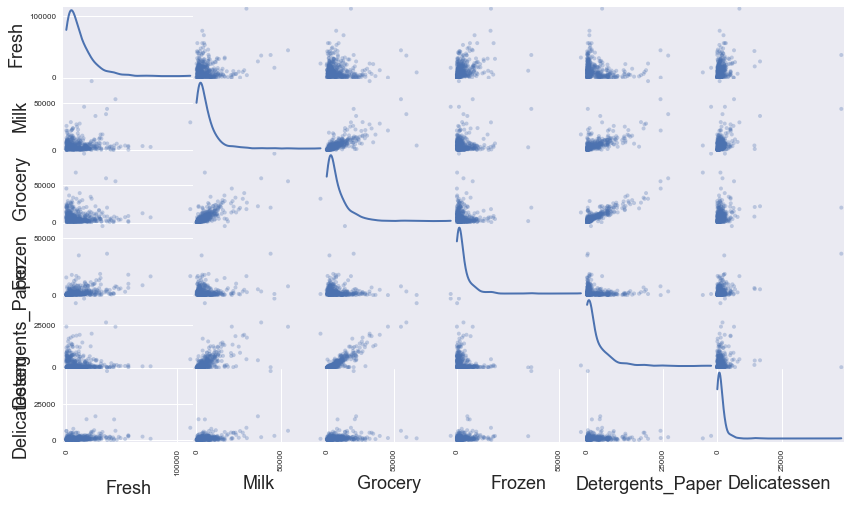

In [10]:
# Produza uma matriz de dispersão para cada um dos pares de atributos dos dados
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Questão 3
*Há algum par de atributos que mostra algum grau de correlação? Isso confirma ou nega a suspeita sobre relevância do atributo que você tentou prever? Como os dados desses atributos são distribuídos?*  
**Dica:** Os dados são distribuídos normalmente? Onde a maioria dos pontos de dados está? 

**Resposta:** Sim, há alguns pares que mostram uma correlação forte, como Grocery e Detergents_paper. Esse gráfico afirma a correlação prevista acima pois o atributo Fresh parece não estar correlacionado diretamente com nenhuma variável. Os atributos parecem não ter uma distribuição normal, tem um pico muito grande em valores baixos e diminuem gradativamente.

## Pré-processamento de Dados
Nesta seção, você irá pré-processar os dados para criar uma melhor representação dos clientes ao executar um escalonamento dos dados e detectando os discrepantes. Pré-processar os dados é geralmente um passo fundamental para assegurar que os resultados obtidos na análise são importantes e significativos.

### Implementação: Escalonando Atributos
Se os dados não são distribuídos normalmente, especialmente se a média e a mediana variam significativamente (indicando um grande desvio), é quase sempre [apropriado] ](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) aplicar um escalonamento não linear – particularmente para dados financeiros. Uma maneira de conseguir escalonar dessa forma é utilizando o [ teste Box-Cox](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), que calcula o melhor poder de transformação dos dados, que reduzem o desvio. Uma abordagem simplificada que pode funcionar na maioria dos casos seria aplicar o algoritmo natural.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribua uma cópia dos dados para o `log_data` depois de aplicar um algoritmo de escalonamento. Utilize a função `np.log` para isso.
 - Atribua uma cópia da amostra do dados para o `log_samples` depois de aplicar um algoritmo de escalonamento. Novamente, utilize o `np.log`.

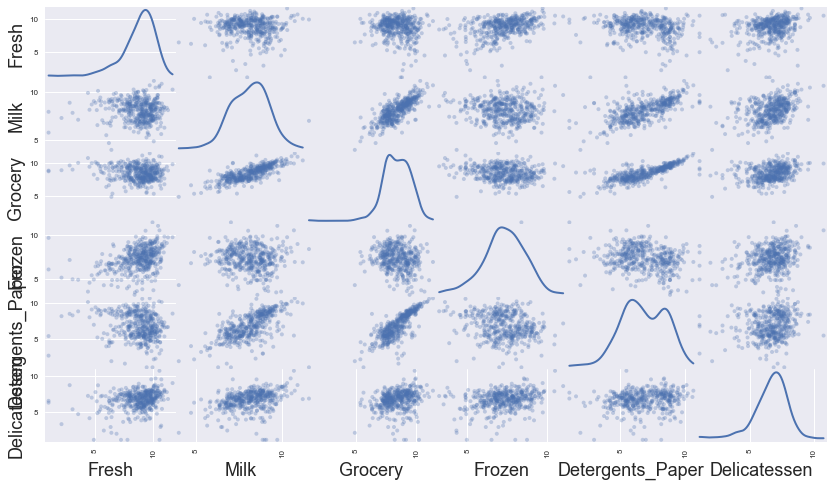

In [11]:
# TODO: Escalone os dados utilizando o algoritmo natural
log_data = np.log(data.copy())

# TODO: Escalone a amostra de dados utilizando o algoritmo natural
log_samples = np.log(samples)

# Produza uma matriz de dispersão para cada par de atributos novos-transformados
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observação
Após aplicar o algoritmo natural para o escalonamento dos dados, a distribuição para cada atributo deve parecer mais normalizado. Para muitos pares de atributos, você vai precisar identificar anteriormente como sendo correlacionados, observe aqui se essa correlação ainda está presente (e se está mais forte ou mais fraca que antes).

Execute o código abaixo para ver como a amostra de dados mudou depois do algoritmo natural ter sido aplicado a ela.

In [12]:
# Mostre a amostra dados log-transformada
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6.63,9.83,7.41,8.72,6.28,8.32
1,7.25,9.72,10.27,6.51,6.73,1.10
2,10.68,8.52,9.00,8.75,7.36,9.57


### Implementação: Detecção de Discrepantes
Identificar dados discrepantes é extremamente importante no passo de pré-processamento de dados de qualquer análise. A presença de discrepantes podem enviesar resultados que levam em consideração os pontos de dados. Há muitas "regras básicas" que constituem um discrepante em um conjunto de dados. Aqui usaremos [o Método Turco para identificar discrepantes](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): Um *passo do discrepante* é calculado 1,5 vezes a variação interquartil (IQR). Um ponto de dados com um atributo que está além de um passo de um discrepante do IQR para aquele atributo, ele é considerado anormal.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribuir o valor do 25º percentil do atributo dado para o `Q1`. Utilizar `np.percentile` para isso.
 - Atribuir o valor do 75º percentil do atributo dado para o `Q3`. Novamente, utilizar `np.percentile`.
 - Atribuir o cálculo de um passo do discrepante do atributo dado para o `step`.
 - Remover opcionalmentos os pontos de dados do conjunto de dados ao adicionar índices à lista de `outliers`.

**NOTA:** Se você escolheu remover qualquer discrepante, tenha certeza que a amostra de dados não contém nenhum desses pontos!  
 Uma vez que você executou essa implementação, o conjunto de dado será armazenado na variável `good_data`!Once you have performed this implementation, the dataset will be stored in the variable .

In [24]:
outliers = []
# Para cada atributo encontre os pontos de dados com máximos valores altos e baixos
for feature in log_data.keys():
    
    # TODO: Calcule Q1 (25º percentil dos dados) para o atributo dado
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calcule Q3 (75º percentil dos dados) para o atributo dado
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Utilize a amplitude interquartil para calcular o passo do discrepante (1,5 vezes a variação interquartil)
    step = 1.5 *(Q3- Q1)
    
    # Mostre os discrepantes
    print "Data points considered outliers for the feature '{}':".format(feature)
    out = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    outliers = np.append(outliers, out.index.values) 
    display(out)
    
# OPCIONAL: Selecione os índices dos pontos de dados que você deseja remover
outliers = np.unique([int(i) for i in outliers])
print 'indices dos pontos removidos: ', outliers

# Remova os discrepantes, caso nenhum tenha sido especificado
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.44,9.95,10.73,3.58,10.10,7.26
66,2.20,7.34,8.91,5.16,8.15,3.30
81,5.39,9.16,9.58,5.65,8.96,5.05
95,1.10,7.98,8.74,6.09,5.41,6.56
96,3.14,7.87,9.00,4.98,8.26,5.38
128,4.94,9.09,8.25,4.96,6.97,1.10
171,5.30,10.16,9.89,6.48,9.08,8.74
193,5.19,8.16,9.92,6.87,8.63,6.50
218,2.89,8.92,9.63,7.16,8.48,8.76
304,5.08,8.92,10.12,6.42,9.37,7.79


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.04,11.21,10.38,6.89,9.91,6.81
98,6.22,4.72,6.66,6.80,4.03,4.88
154,6.43,4.01,4.92,4.32,1.95,2.08
356,10.03,4.90,5.38,8.06,2.20,6.31


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.92,7.04,1.10,8.39,1.10,6.88
154,6.43,4.01,4.92,4.32,1.95,2.08


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.43,9.66,9.72,3.50,8.85,6.07
57,8.60,9.20,9.26,3.64,8.93,7.16
65,4.44,9.95,10.73,3.58,10.10,7.26
145,10.00,9.03,10.46,3.74,9.44,8.40
175,7.76,8.97,9.38,3.95,8.34,7.44
264,6.98,9.18,9.65,4.11,8.70,7.14
325,10.40,9.73,9.52,11.02,7.15,8.63
420,8.40,8.57,9.49,3.22,8.83,7.24
429,9.06,7.47,8.18,3.85,4.43,7.82
439,7.93,7.44,7.83,4.17,6.17,3.95


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.92,7.04,1.10,8.39,1.10,6.88
161,9.43,6.29,5.65,7.00,1.10,7.71


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.20,7.34,8.91,5.16,8.15,3.30
109,7.25,9.72,10.27,6.51,6.73,1.10
128,4.94,9.09,8.25,4.96,6.97,1.10
137,8.03,9.00,9.02,6.49,6.58,3.58
142,10.52,8.88,9.02,8.00,3.00,1.10
154,6.43,4.01,4.92,4.32,1.95,2.08
183,10.51,10.69,9.91,10.51,5.48,10.78
184,5.79,6.82,8.46,4.30,5.81,2.40
187,7.80,8.99,9.19,8.74,8.15,1.10
203,6.37,6.53,7.70,6.15,6.86,2.89


indices dos pontos removidos:  [ 38  57  65  66  75  81  86  95  96  98 109 128 137 142 145 154 161 171
 175 183 184 187 193 203 218 233 264 285 289 304 305 325 338 343 353 355
 356 357 412 420 429 439]


### Questão 4
*Há alguns pontos de dado considerados discrepantes de mais de um atributo baseado na definição acima? Esses pontos de dados deveriam ser removidos do conjunto? Se qualquer ponto de dados foi adicionado na lista `outliers` para ser removido, explique por quê.* 

**Resposta:** Sim, há pontos que foram discrepantes em mais de um atributo, visto que 49 pontos totais foram considerados discrepantes e 42 foram removidos. Talvez esses pontos não precisariam ser removidos, pois indica que o próprio comprador é um ponto fora da curva, ou seja, ele tende a comprar mais (ou menos) que o normal. Os dados adicionados na lista de outliers foram removidos pois provavelmente seriam erros gerados durante o treinamento e poderiam enviesar o modelo. Apesar de serem cerca de 10% dos dados totais, em uma primeira análise deveriam ser removidos.

## Transformação de Atributo
Nesta seção, você irá utilizar a análise de componentes principais (PCA) para elaborar conclusões sobre a estrutura subjacente de dados de clientes do atacado Dado que ao utilizar a PCA em conjunto de dados calcula as dimensões que melhor maximizam a variância, nós iremos encontrar quais combinações de componentes de atributos melhor descrevem os consumidores.

### Implementação: PCA

Agora que os dados foram escalonados em uma distribuição normal e qualquer discrepante necessário foi removido, podemos aplicar a PCA na `good_data` para descobrir qual dimensão dos dados melhor maximizam a variância dos atributos envolvidos. Além de descobrir essas dimensões, a PCA também irá reportar a *razão da variância explicada* de cada dimensão – quanta variância dentro dos dados é explicada pela dimensão sozinha. Note que o componente (dimensão) da PCA pode ser considerado como um novo "feature" do espaço, entretanto, ele é uma composição do atributo original presente nos dados.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Importar o `sklearn.decomposition.PCA` e atribuir os resultados de ajuste da PCA em seis dimensões com o `good_data` para o `pca`.
 - Aplicar a transformação da PCA na amostra de log-data `log_samples` utilizando `pca.transform`, e atribuir os resultados para o `pca_samples`.

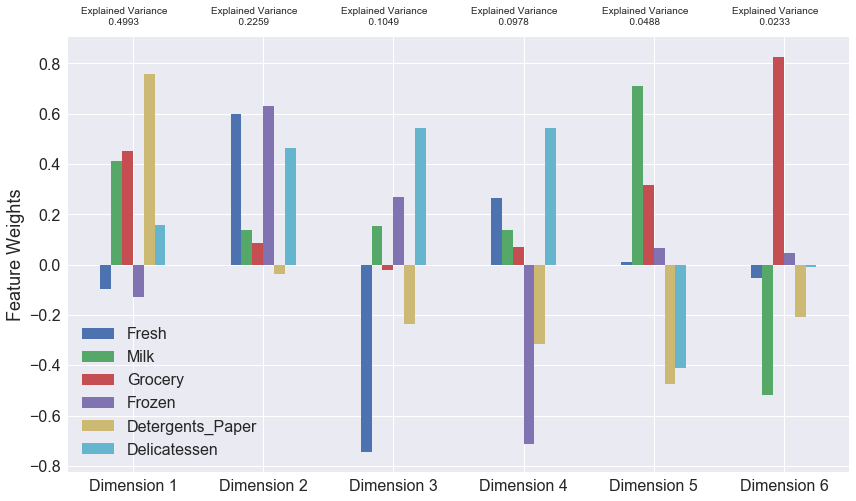

In [38]:
from sklearn.decomposition import PCA

# TODO: Aplique a PCA ao ajustar os bons dados com o mesmo número de dimensões como atributos
pca = PCA(n_components = len(good_data.columns)).fit(good_data)

# TODO: Transforme a amostra de data-log utilizando o ajuste da PCA acima
pca_samples = pca.transform(log_samples)

# Gere o plot dos resultados da PCA
pca_results = rs.pca_results(good_data, pca)

### Questão 5
*Quanta variância nos dados é explicado * ***no total*** * pelo primeiro e segundo principal componente? E os quatro primeiros principais componentes? Utilizando a visualização fornecida acima, discuta quais das quatro primeiras dimensões melhor representa em termos de despesas dos clientes.*  
**Dica:** Uma melhora positiva dentro de uma dimensão específica corresponde a uma *melhora* do atributos de *pesos-positivos* e uma *piora* dos atributos de *pesos-negativos*. A razão de melhora ou piora é baseada nos pesos de atributos individuais.

**Resposta:** O primeiro componente corresponde a aproximadamente 50% da variância total, o segundo por aproximadamente 22,6%, somando, até aqui, 72,6%. O terceiro e quarto componente tem valores de  10,5% e 9,8%, respectivamente. Os primeiros 4 componentes somam 92,9%. A primeira dimensão tem nos seus maiores pesos Leite, Mercearia e Detergentes. A segunda dimensão da maior peso para os outros grupos, diferentes da 1a, o que mostra que elas são aproximadamente ortogonais. 

### Observação
Execute o código abaixo para ver como a amostra de log transformado mudou depois de receber a transformação da PCA aplicada a ele em seis dimensões. Observe o valor numérico para as quatro primeiras dimensões para os pontos da amostra. Considere se isso for consistente com sua interpretação inicial dos pontos da amostra.

In [39]:
# Exiba a amostra de log-data depois de aplicada a tranformação da PCA
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.17,0.30,3.29,-0.38,0.57,-1.44
1,0.83,-3.85,-1.86,-2.53,4.02,0.82
2,0.96,3.25,0.47,0.95,-0.84,0.10


### Implementação: Redução da Dimensionalidade
Ao utilizar um componente principal de análise, um dos objetivos principais é reduzir a dimensionalidade dos dados – na realidade, reduzindo a complexidade do problema. Redução de dimensionalidade tem um custo: Poucas dimensões utilizadas implicam em menor variância total dos dados que estão sendo explicados. Por causo disso, a *taxa de variância explicada cumulativa* é extremamente importante para saber como várias dimensões são necessárias para o problema. Além disso, se uma quantidade significativa de variância é explicada por apenas duas ou três dimensões, os dados reduzidos podem ser visualizados depois.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribuir os resultados de ajuste da PCA em duas dimensões com o `good_data` para o `pca`.
 - Atribuir a tranformação da PCA do `good_data` utilizando `pca.transform`, e atribuir os resultados para `reduced_data`.
 - Aplicar a transformação da PCA da amostra do log-data `log_samples` utilizando `pca.transform`, e atribuindo os resultados ao `pca_samples`.

In [40]:
# TODO: Aplique o PCA ao ajusta os bons dados com apenas duas dimensões
pca = PCA(n_components = 2).fit(good_data)

# TODO: Transforme os bons dados utilizando o ajuste do PCA acima
reduced_data = pca.transform(good_data)

# TODO: Transforme a amostre de log-data utilizando o ajuste de PCA acima
pca_samples = pca.transform(log_samples)

# Crie o DataFrame para os dados reduzidos
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observação
Execute o código abaixo para ver como a amostra de dados do log-transformado mudou depois de receber a transformação do PCA aplicada a ele em seis dimensões. Observe o valor numérico para as quatro primeiras dimensões para os pontos da amostra. Considere se isso for consistente com sua interpretação inicial dos pontos da amostra.

In [41]:
# Exiba a amostra de log-data depois de aplicada a transformação da PCA em duas dimensões
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.17,0.30
1,0.83,-3.85
2,0.96,3.25


## Clustering

Nesta seção, você irá escolher utilizar entre o algoritmo de clustering K-Means ou o algoritmo de clustering do Modelo de Mistura Gaussiano para identificar as várias segmentações de clientes escondidos nos dados. Então você irá recuperar pontos de dados específicos do cluster para entender seus significados ao transformá-los de volta em suas dimensões e escalas originais. 

### Questão 6
*Quais são as vantagens de utilizar o algoritmo de clustering K-Means? Quais são as vantagens de utilizar o algoritmo de clustering do Modelo de Mistura Gaussiano? Dadas as suas observações até agora sobre os dados de clientes da distribuidora, qual dos dois algoritmos você irá utilizar e por quê.*

**Resposta:**

** K- Means **: As vantagens desse algoritmo são:
- funciona bem quando mesmo que as hipóteses não sejam verdadeiras.
- facil de implementar
- facil interpretação dos clusters
- rapidez no processamento

** Modelo de mistura Gaussiano **: As vantagens desse algoritmo são:
- é mais flexível em termos de covariância (K-means é um caso especial, no qual a variância tende a 0)
- os clusters podem apresentar formatos elipticos, tornando a atribuição de pontos aos clusters mais flexível, como pode ser observado na imagem abaixo.

![alt text](https://qph.ec.quoracdn.net/main-qimg-d7d5c9fb163cc5a64663492953a53c8a)

- nesse modelo, os pontos podem pertencer a mais de um cluster, tendo seu valor como a probabilidade do ponto pertencer a cada cluster supondo distribuição normal dos pontos, o que não acontece no K-means.

** Modelo utilizado **: o modelo que será utilizado é o K-means cluster, por ser de facil implementação e de rápido processamento. Além disso, é desejavel que cada estabelecimento pertença a um só segmento, pois na realidade é o que acontece.

Referências: [Quora - GMM](https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm), [Quora - K-means](https://www.quora.com/What-are-the-advantages-of-K-Means-clustering)


### Implementação: Criando Clusters
Dependendo do problema, o número de clusters que você espera que estejam nos dados podem já ser conhecidos. Quando um número de clusters não é conhecido *a priori*, não há garantia que um dado número de clusters melhor segmenta os dados, já que não é claro quais estruturas existem nos dados – se existem. Entretanto, podemos quantificar a "eficiência" de um clustering ao calcular o *coeficiente de silhueta* de cada ponto de dados. O [coeficiente de silhueta](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) para um ponto de dado mede quão similar ele é do seu cluster atribuído, de -1 (não similar) a 1 (similar). Calcular a *média* do coeficiente de silhueta fornece um método de pontuação simples de um dado clustering.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Ajustar um algoritmo de clustering para o `reduced_data` e atribui-lo ao `clusterer`.
 - Prever o cluster para cada ponto de dado no `reduced_data` utilizando o `clusterer.predict` e atribuindo eles ao `preds`.
 - Encontrar os centros do cluster utilizando o atributo respectivo do algoritmo e atribuindo eles ao `centers`.
 - Prever o cluster para cada amostra de pontos de dado no `pca_samples` e atribuindo eles ao `sample_preds`.
 - Importar sklearn.metrics.silhouette_score e calcular o coeficiente de silhueta do `reduced_data` contra o do `preds`.
   - Atribuir o coeficiente de silhueta para o `score` e imprimir o resultado.

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = {}
for i in range(2,11):
    # TODO: Aplique o algoritmo de clustering de sua escolha aos dados reduzidos 
    clusterer = KMeans(n_clusters=i, random_state=420).fit(reduced_data)

    # TODO: Preveja o cluster para cada ponto de dado
    preds = clusterer.predict(reduced_data)

    # TODO: Ache os centros do cluster
    centers = clusterer.cluster_centers_

    # TODO: Preveja o cluster para cada amostra de pontos de dado transformados
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calcule a média do coeficiente de silhueta para o número de clusters escolhidos
    score = silhouette_score(reduced_data, clusterer.labels_, metric = 'euclidean')
    
    print 'Score para n_clusters = ', i, ': {:.4f}'.format(score)
    scores[i] = score

Score para n_clusters =  2 : 0.4472
Score para n_clusters =  3 : 0.3640
Score para n_clusters =  4 : 0.3312
Score para n_clusters =  5 : 0.3532
Score para n_clusters =  6 : 0.3628
Score para n_clusters =  7 : 0.3557
Score para n_clusters =  8 : 0.3673
Score para n_clusters =  9 : 0.3675
Score para n_clusters =  10 : 0.3510


<function matplotlib.pyplot.show>

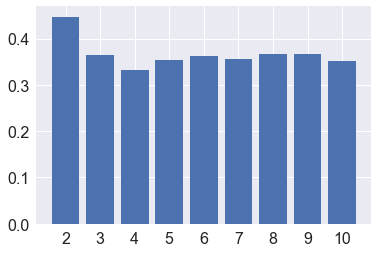

In [62]:
plt.bar(range(len(scores)), scores.values(), tick_label= list(scores.keys()))
plt.show

### Questão 7
*Reporte o coeficiente de silhueta para vários números de cluster que você tentou. Dentre eles, qual a quantidade de clusters que tem a melhor pontuação de silhueta?* 

**Resposta:** Como pode ser observado no gráfico acima, o numero de clusters que obteve a melhor pontuação foi 2. A partir desse número, os resultados se mativeram apriximadamente constantes.

### Visualização de Cluster
Uma vez que você escolheu o número ótimo de clusters para seu algoritmo de clustering utilizando o método de pontuação acima, agora você pode visualizar os resultados ao executar o bloco de código abaixo. Note que, para propósitos de experimentação, é de bom tom que você ajuste o número de clusters para o seu algoritmo de cluster para ver várias visualizações. A visualização final fornecida deve, entretanto, corresponder com o número ótimo de clusters. 

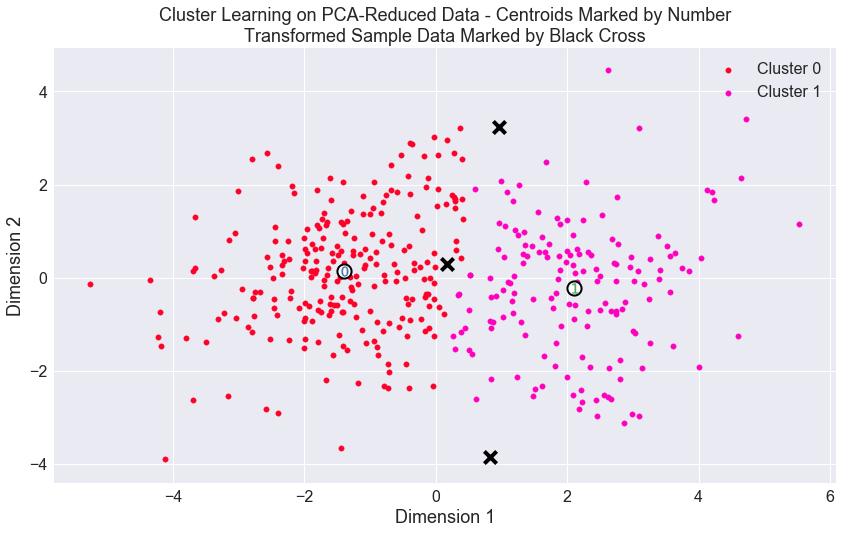

In [64]:
clusterer = KMeans(n_clusters=2, random_state=420).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(pca_samples)

# Mostre os resultados do clustering da implementação
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementação: Recuperação de Dados
Cada cluster apresentado na visualização acima tem um ponto central. Esses centros (ou médias) não são especificamente pontos de dados não específicos dos dados, em vez disso, são *as médias* de todos os pontos estimados em seus respectivos clusters. Para o problema de criar segmentações de clientes, o ponto central do cluster corresponde *a média dos clientes daquele segmento*. Já que os dados foram atualmente reduzidos em dimensões e escalas por um algoritmo, nós podemos recuperar a despesa representativa do cliente desses pontos de dados ao aplicar transformações inversas.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Aplicar a transformação inversa para o `centers` utilizando o `pca.inverse_transform`, e atribuir novos centros para o `log_centers`.
 - Aplicar a função inversa do `np.log` para o `log_centers` utilizando `np.exp`, e atribuir os verdadeiros centros para o `true_centers`.


In [65]:
# TODO: Transforme inversamento os centros
log_centers = pca.inverse_transform(centers)

# TODO: Exponencie os centros
true_centers = np.exp(log_centers)

# Mostre os verdadeiros centros
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9451.00,1938.00,2449.00,2200.00,307.00,771.00
Segment 1,5424.00,7780.00,11532.00,1123.00,4444.00,1136.00


In [66]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00
mean,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


### Questão 8
Considere o gasto total de compra de cada categoria de produto para os pontos de dados representativos acima e reporte a descrição estatística do conjunto de dados no começo do projeto. Qual conjunto de estabelecimentos cada segmentação de clientes representa?*  
**Dica:** Um cliente que é atribuído ao `'Cluster X'` deve se identificar melhor com os estabelecimentos representados pelo conjunto de atributos do `'Segment X'`.

**Resposta:** 

O **Segmento 0** representa estabelecimentos que compram mais produtos frescos (está acima da mediana) e congelados. Compram pouco leite, fazem poucas compras em mercearia, em detergentes/papel e delicatessen. Esse segmento pode representar clientesque produzem a própria comida, como restaurantes, lanchonetes, bares, etc. 

O **Segmento 1**, por outro lado, é representado por clientes que tem altos gastos em mercearias, delicatessen, leite e compram também itens frescos. Esse segmento pode ser representado por estabelecimentos que vendem mercadoria para outros clientes, que pode ser representados por supermercados, mercearias, etc. 

### Questão 9
*Para cada amostra de ponto, qual segmento de cliente da* ***Questão 8*** *é melhor representado? As previsões para cada amostra de ponto são consistentes com isso?*

Execute o bloco de códigos abaixo para saber a previsão de segmento para cada amostra de ponto.

In [67]:
# Mostre as previsões
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


In [70]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,759,18664,1660,6114,536,4100
1,1406,16729,28986,673,836,3
2,43265,5025,8117,6312,1579,14351


**Resposta:** 

A **amostra 0** não está bem representada pelo que foi dito na questão 8. Pelas altas compras de leite, congelados e delicatessen, com baixissima compra de produtos frescos, provavelmente vende seus produtos para clientes.

A **amostra 1** parece estar bem representada pelo que foi dito na questão 8. Os altos valores para compras de leite, mercearia e poucos itens frescos (relativamente ao valor gasto nos outros setores) não parece estar ligado a quem produz alimentos.

A **amostra 2** pode ser representada pelos clientes do cluster 0 como os do cluster 1. Altas comprs de produtos frescos, congelados e delicatessen podem estar ligadas a resturantes como a supermercados, mas talvez estejam ligadas mais ao último.

Os 3 pontos tem algo em comum: todos estão muito proximos da fronteira de decisão, por isso a distinção de segmentos entre eles não é taõ clara.

## Conclusão

Nesta seção final, você irá investigar maneiras de fazer uso dos dados que estão em clusters. Primeiro você vai considerar quais são os diferentes grupos de clientes, a **segmentação de clientes**, que pode ser afetada diferentemente por um esquema de entrega específico. Depois, você vai considerar como dar um rótulo para cada cliente (qual *segmento* aquele cliente pertence), podendo fornecer atributos adicionais sobre os dados do cliente. Por último, você vai comparar a **segmentação de clientes** com uma variável escondida nos dados, para ver se o cluster identificou certos tipos de relação.

### Questão 10
Empresas sempre irão executar os [testes A/B](https://en.wikipedia.org/wiki/A/B_testing) ao fazer pequenas mudanças em seus produtos ou serviços para determinar se ao fazer aquela mudança, ela afetará seus clientes de maneira positiva ou negativa. O distribuidor de atacado está considerando mudar seu serviço de entrega de atuais 5 dias por semana para 3 dias na semana. Mas o distribuidor apenas fará essa mudança no sistema de entrega para os clientes que reagirem positivamente. *Como o distribuidor de atacado pode utilizar a segmentação de clientes para determinar quais clientes, se há algum, que serão alcançados positivamente à mudança no serviço de entrega?*  
**Dica:** Podemos supor que as mudanças afetam todos os clientes igualmente? Como podemos determinar quais grupos de clientes são os mais afetados?

**Resposta:** De acordo com os dados, não dá para ter um insight claro de qual segmento de clientes reagiria positivamente à mudança. Essa mudança na distribuição não impactaria tanto clientes que compram menos produtos frescos, pois estes poderiam ser entregues com menos frequencia. Clientes que compram mais produtos frescos provavelmente demandam entregas mais frequentes, já que esses produtos perdem qualidade com o passar dos dias. O teste A/B deveria ser conduzido em ambos os grupos.

### Questão 11
A estrutura adicional é derivada dos dados não rotulados originalmente quando utilizado as técnicas de clustering. Dado que cada cliente tem um **segmento de cliente** que melhor se identifica (dependendo do algoritmo de clustering aplicado), podemos considerar os *segmentos de cliente* como um **atributo construído (engineered)** para os dados. Assumindo que o distribuidor de atacado adquiriu recentemente dez novos clientes e cada um deles forneceu estimativas dos gastos anuais para cada categoria de produto. Sabendo dessas estimativas, o distribuidor de atacado quer classificar cada novo cliente em uma **segmentação de clientes** para determinar o serviço de entrega mais apropriado.  
*Como o distribuidor de atacado pode rotular os novos clientes utilizando apenas a estimativa de despesas com produtos e os dados de* ***segmentação de clientes*** *  
**Dica:** Um aprendiz supervisionado pode ser utilizado para treinar os clientes originais. Qual seria a variável alvo?

**Resposta:** O cluster que os clientes desse projeto pertencem poderia ser a variável alvo de um algoritmo de aprendizagem supervisionada, porém não vejo motivo para isso, dado que o algoritmo de cluster já está treinado, seria necessário apenas colocar os dados do novo cliente na função clusterer.predict.

### Visualizando Distribuições Subjacentes

No começo deste projeto, foi discutido que os atributos `'Channel'` e `'Region'` seriam excluídos do conjunto de dados, então as categorias de produtos do cliente seriam enfatizadas na análise. Ao reintroduzir o atributo `'Channel'` ao conjunto de dados, uma estrutura interessante surge quando consideramos a mesma redução de dimensionalidade da PCA aplicada anteriormente no conjunto de dados original.

Execute o código abaixo para qual ponto de dados é rotulado como`'HoReCa'` (Hotel/Restaurante/Café) ou o espaço reduzido `'Retail'`. Al´´em disso, você vai encontrar as amostras de pontos circuladas no corpo, que identificará seu rótulo.

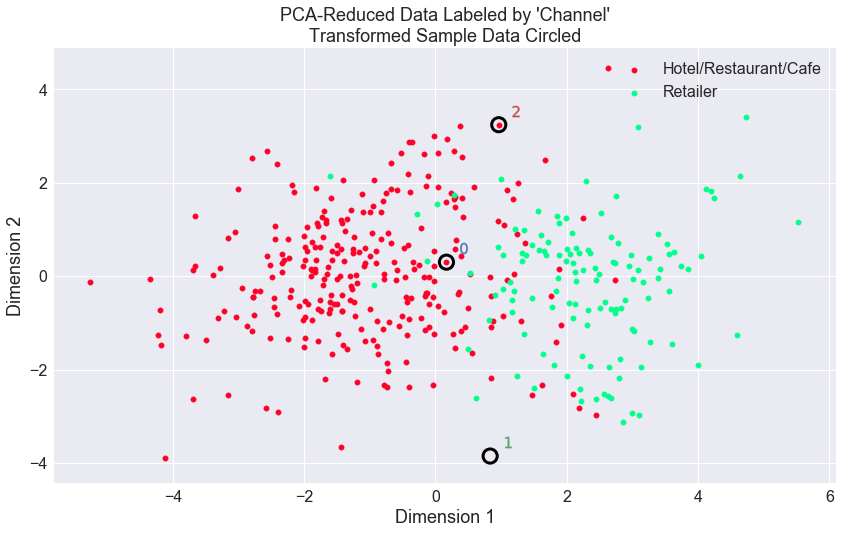

In [71]:
# Mostre os resultados do clustering baseado nos dados do 'Channel'
rs.channel_results(reduced_data, outliers, pca_samples)

### Questão 12
*Quão bom é o algoritmo de clustering e o números de clusters que você escolheu comparado a essa distribuição subjacente de clientes de Hotel/Restaurante/Café a um cliente Varejista? Há segmentos de clientes que podem ser classificados puramente como 'Varejistas' ou 'Hotéis/Restaurantes/Cafés' nessa distribuição? Você consideraria essas classificações como consistentes comparada a sua definição de segmentação de clientes anterior?*

**Resposta:** O algoritmo de clustering foi satisfatório, pois representou bem os segmentos reais, apesar de o k-means gerar uma fronteira de decisão bem definida, o que é um erro, pois na realidade existem muitos pontos de um segmento que permeiam o cluster do outro segmento. A análise de silhouette score se mostrou um bom pontuador, pois indicou que o melhor número de clusters era realmente 2. Como dito anteriormente, há alguns pontos extremos que podem ser considerados puramente um segmento ou o outro, porém, existe um ruido entre os pontos que gera uma intersecção entre os conjuntos.

> **Nota**: Uma vez que você completou todas as implementações de código e respondeu todas as questões acima com êxito, você pode finalizar seu trabalho exportando um iPython Notebook como um documento HTML. Você pode fazer isso utilizando o menu acima e navegando até  
**File -> Download as -> HTML (.html)**. Inclua o documento finalizado junto com esse Notebook para o seu envio.